In [166]:
import pickle as pkl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import signal
from scipy.signal import welch
from scipy.signal import stft
%matplotlib inline

In [167]:
labels_twente = []
labels_geneva = []
data_twente = []
data_geneva = []

In [168]:
twente = []
for n in range(1, 23): 
    s = ''
    if n < 10:
        s += '0'
    s += str(n)
    twente.append(s)
print(twente)

['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22']


In [169]:
geneva = []
for n in range(23, 33): 
    s = ''
    s += str(n)
    geneva.append(s)
print(geneva)

['23', '24', '25', '26', '27', '28', '29', '30', '31', '32']


In [170]:
for i in twente:
    file = 's' + i + '.dat'
    with open(file, 'rb') as f:
        x = pkl.load(f, encoding='latin1')
    labels_twente.append(x['labels'])
    data_twente.append(x['data'])


In [171]:
for i in geneva:
    file = 's' + i + '.dat'
    with open(file, 'rb') as f:
        x = pkl.load(f, encoding='latin1')
    labels_geneva.append(x['labels'])
    data_geneva.append(x['data'])

In [172]:
labels_twente = np.array(labels_twente)
data_twente = np.array(data_twente)
labels_twente = labels_twente.flatten()
data_twente = data_twente.flatten()
labels_twente = labels_twente.reshape(880,4)
data_twente = data_twente.reshape(880,40,8064)


In [173]:
labels_geneva = np.array(labels_geneva)
data_geneva = np.array(data_geneva)
labels_geneva = labels_geneva.flatten()
data_geneva = data_geneva.flatten()
labels_geneva = labels_geneva.reshape(400,4)
data_geneva = data_geneva.reshape(400,40,8064)


In [174]:
labels = np.concatenate((labels_twente, labels_geneva))
data = np.concatenate((data_twente, data_geneva))

In [175]:
df_labels = pd.DataFrame({'Valence': labels[:,0], 'Arousal': labels[:,1], 'Dominance': labels[:,2], 'Liking': labels[:,3]})

In [176]:
# df_labels.to_pickle("df_labels")
# np.save("data", data)

In [177]:
df_labels.describe

<bound method NDFrame.describe of       Valence  Arousal  Dominance  Liking
0        7.71     7.60       6.90    7.83
1        8.10     7.31       7.28    8.47
2        8.58     7.54       9.00    7.08
3        4.94     6.01       6.12    8.06
4        6.96     3.92       7.19    6.05
...       ...      ...        ...     ...
1275     3.91     6.96       5.82    3.12
1276     2.81     6.13       6.06    1.04
1277     3.05     7.01       5.10    1.10
1278     3.99     7.17       4.85    1.00
1279     7.15     4.03       9.00    1.88

[1280 rows x 4 columns]>

In [178]:
df_labels.head()

,Valence,Arousal,Dominance,Liking
0,7.71,7.60,6.90,7.83
1,8.10,7.31,7.28,8.47
2,8.58,7.54,9.00,7.08
3,4.94,6.01,6.12,8.06
4,6.96,3.92,7.19,6.05


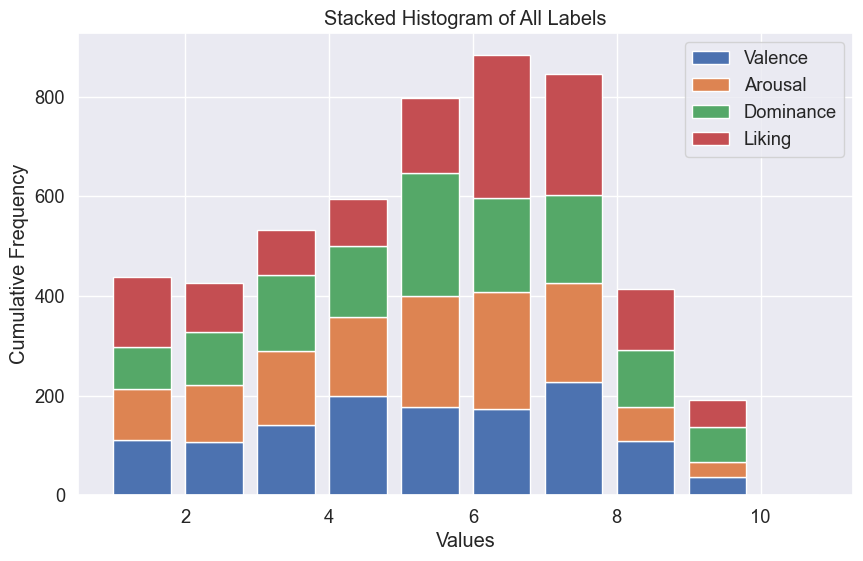

In [179]:
cumulative_freq = np.zeros(10)
plt.figure(figsize=(10, 6))

for column in df_labels.columns:
    hist, bins = np.histogram(df_labels[column], bins=10, range=(1, 11))
    plt.bar(bins[:-1], hist, width=0.8, align='edge', bottom=cumulative_freq, label=column)
    cumulative_freq += hist

plt.xlabel('Values')
plt.ylabel('Cumulative Frequency')
plt.title('Stacked Histogram of All Labels')
plt.legend()
plt.grid(True)
plt.show()

In [180]:
df_hahv = df_labels[(df_labels['Valence'] >= np.median(labels[:,0])) & (df_labels['Arousal'] >= np.median(labels[:,1]))]
df_lahv = df_labels[(df_labels['Valence'] >= np.median(labels[:,0])) & (df_labels['Arousal'] < np.median(labels[:,1]))]
df_halv = df_labels[(df_labels['Valence'] < np.median(labels[:,0])) & (df_labels['Arousal'] >= np.median(labels[:,1]))]
df_lalv = df_labels[(df_labels['Valence'] < np.median(labels[:,0])) & (df_labels['Arousal'] < np.median(labels[:,1]))]

In [181]:
print("Median Valence (to divide positive and negative): ", df_labels['Valence'].median())
print("Median Arousal (to divide high and low): ", df_labels['Arousal'].median())

Median Valence (to divide positive and negative):  5.04
Median Arousal (to divide high and low):  5.23


In [182]:
print("Positive Valence:", str(len(df_hahv) + len(df_lahv)))
print("Negative Valence:", str(len(df_halv) + len(df_lalv)))
print("High Arousal:", str(len(df_hahv) + len(df_halv)))
print("Low Arousal:", str(len(df_lahv) + len(df_lalv)))

Positive Valence: 680
Negative Valence: 600
High Arousal: 640
Low Arousal: 640


In [183]:
print("High Arousal Positive Valence (HAPV):", str(len(df_hahv)))
print("Low Arousal Positive Valence (LAHV):", str(len(df_lahv)))
print("High Arousal Negative Valence (HALV):", str(len(df_halv)))
print("Low Arousal Negative Valence (LALV):", str(len(df_lalv)))

High Arousal Positive Valence (HAPV): 358
Low Arousal Positive Valence (LAHV): 322
High Arousal Negative Valence (HALV): 282
Low Arousal Negative Valence (LALV): 318


In [184]:
print("HAHV")
print("Valence:", "Mean", np.round(df_hahv['Valence'].mean(),2), "STD", np.round(df_hahv['Valence'].std(),2))
print("Arousal:", "Mean", np.round(df_hahv['Arousal'].mean(),2), "STD", np.round(df_hahv['Arousal'].std(),2))
print()
print("LAHV:")
print("Valence:", "Mean", np.round(df_lahv['Valence'].mean(),2), "STD", np.round(df_lahv['Valence'].std(),2))
print("Arousal:", "Mean", np.round(df_lahv['Arousal'].mean(),2), "STD", np.round(df_lahv['Arousal'].std(),2))
print()
print("HALV:")
print("Valence:", "Mean", np.round(df_halv['Valence'].mean(),2), "STD", np.round(df_halv['Valence'].std(),2))
print("Arousal:", "Mean", np.round(df_halv['Arousal'].mean(),2), "STD", np.round(df_halv['Arousal'].std(),2))
print()
print("LALV:")
print("Valence:", "Mean", np.round(df_lalv['Valence'].mean(),2), "STD", np.round(df_lalv['Valence'].std(),2))
print("Arousal:", "Mean", np.round(df_lalv['Arousal'].mean(),2), "STD", np.round(df_lalv['Arousal'].std(),2))

HAHV
Valence: Mean 7.23 STD 1.03
Arousal: Mean 6.87 STD 0.87

LAHV:
Valence: Mean 6.59 STD 1.1
Arousal: Mean 3.83 STD 1.17

HALV:
Valence: Mean 3.11 STD 1.25
Arousal: Mean 6.8 STD 0.97

LALV:
Valence: Mean 3.59 STD 1.19
Arousal: Mean 3.12 STD 1.32


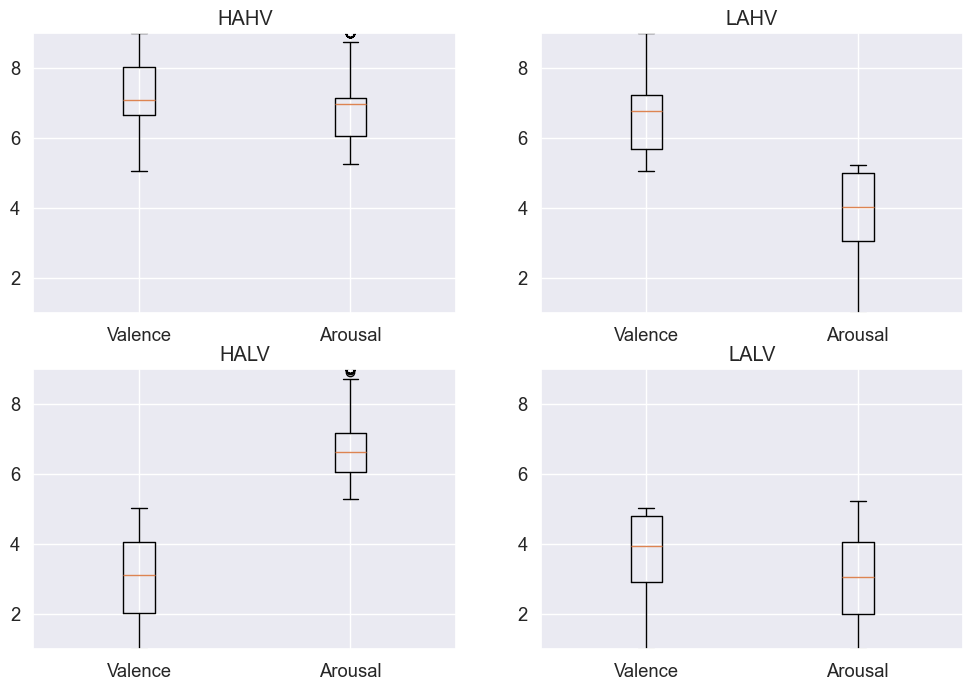

In [185]:
fig, axs = plt.subplots(2, 2, figsize=(12,8))

axs[0,0].set_title("HAHV")
axs[0,0].set_ylim(1, 9)
axs[0,0].boxplot([df_hahv['Valence'], df_hahv['Arousal']], labels=['Valence','Arousal'])

axs[0,1].set_title("LAHV")
axs[0,1].set_ylim(1, 9)
axs[0,1].boxplot([df_lahv['Valence'], df_lahv['Arousal']], labels=['Valence','Arousal'])

axs[1,0].set_title("HALV")
axs[1,0].set_ylim(1, 9)
axs[1,0].boxplot([df_halv['Valence'], df_halv['Arousal']], labels=['Valence','Arousal'])

axs[1,1].set_title("LALV")
axs[1,1].set_ylim(1, 9)
axs[1,1].boxplot([df_lalv['Valence'], df_lalv['Arousal']], labels=['Valence','Arousal']);

In [186]:
eeg_channels = np.array(["Fp1", "AF3", "F3", "F7", "FC5", "FC1", "C3", "T7", "CP5", "CP1", "P3", "P7", "PO3", "O1", "Oz", "Pz", 
                         "Fp2", "AF4", "Fz", "F4", "F8", "FC6", "FC2", "Cz", "C4", "T8", "CP6", "CP2", "P4", "P8", "PO4", "O2"])
peripheral_channels = np.array(["hEOG", "vEOG", "zEMG", "tEMG", "GSR", "Respiration belt", "Plethysmograph", "Temperature"])

In [187]:
eeg_data = []
for i in range (len(data)):
  for j in range (len(eeg_channels)):
    eeg_data.append(data[i,j])
eeg_data = np.reshape(eeg_data, (len(data), len(eeg_channels), len(data[0,0])))
print(eeg_data.shape)

(1280, 32, 8064)


In [188]:
print(data[1,1])

[ 9.49186875 12.58977035 10.57402679 ...  6.0339949   9.06874552
  8.74021419]


In [190]:
peripheral_data = []
for i in range (len(data)):
  for j in range (32,len(data[0])):
    peripheral_data.append(data[i,j])
peripheral_data = np.reshape(peripheral_data, (len(data), len(peripheral_channels), len(data[0,0])))
print(peripheral_data.shape)

(1280, 8, 8064)


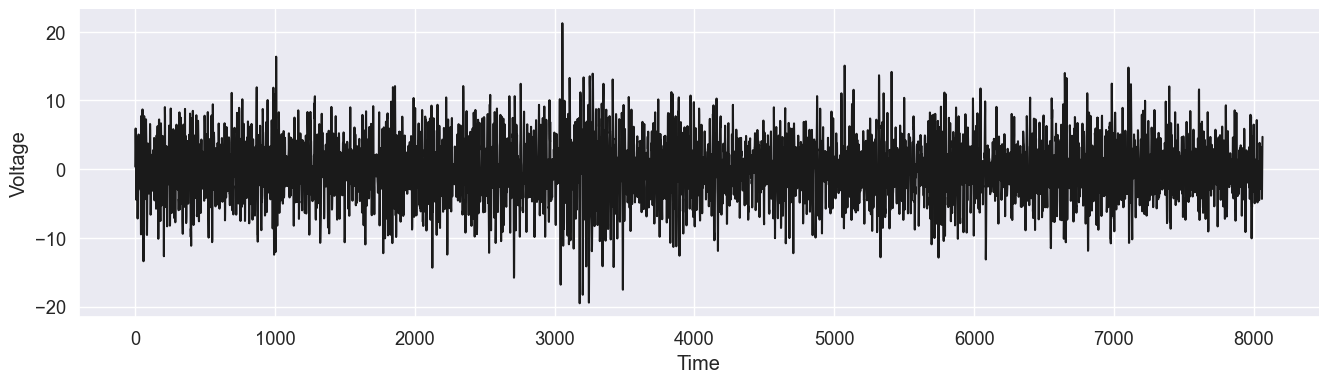

In [ ]:
sns.set_theme(font_scale=1.2)

sf = 128
# time = np.arange(eeg_data.size) / sf

fig, ax = plt.subplots(1, 1, figsize=(16, 4))
plt.plot(eeg_data[0,31], lw=1.5, color='k') 
plt.xlabel('Time')
plt.ylabel('Voltage')
sns.despine()

In [ ]:
print(eeg_data[0,31].shape)

(8064,)


c:\Users\Satansu\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Satansu\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
c:\Users\Satansu\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\transforms.py:2855: ComplexWarning: Casting complex values to real discards the imaginary part
  vmin, vmax = map(float, [vmin, vmax])


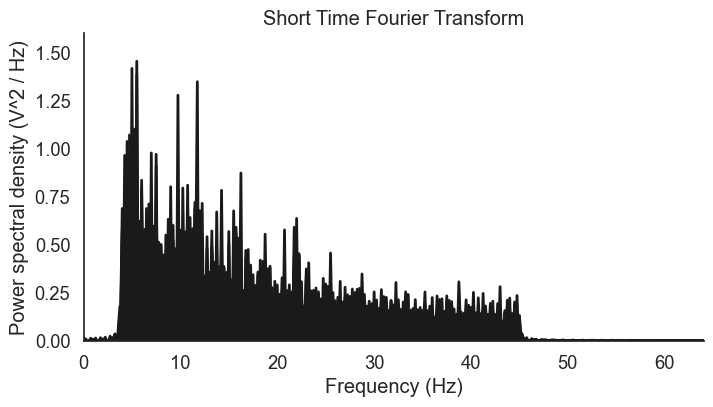

In [ ]:
win = 4 * sf
freqs, time, psd = signal.stft(eeg_data[0,25], sf, nperseg=win)

sns.set(font_scale=1.2, style='white')
plt.figure(figsize=(8, 4))
plt.plot(freqs, psd, color='k', lw=2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (V^2 / Hz)')
plt.ylim([0, psd.max() * 1.1])
plt.title("Short Time Fourier Transform")
plt.xlim([0, freqs.max()])
sns.despine()

In [ ]:
from scipy.fft import fft, fftfreq, fft2, fftn

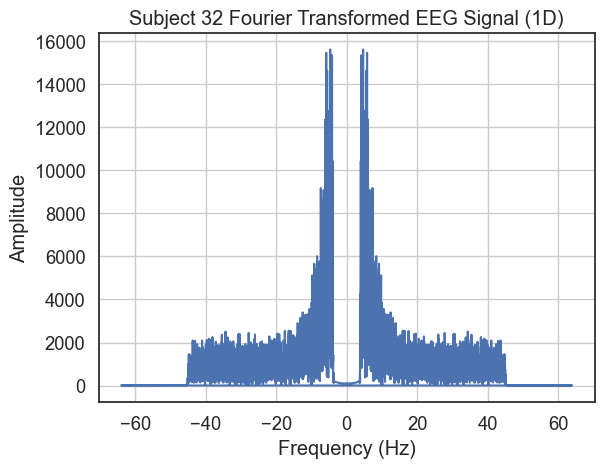

In [ ]:
x = eeg_data[1241,3]
fft_data = fft(x, axis=-1)
freqs = fftfreq(eeg_data.shape[-1], d=1/sf)

plt.plot(freqs, np.abs(fft_data))
plt.title('Subject 32 Fourier Transformed EEG Signal (1D)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# table_data = []
# for trial_index in range(eeg_data.shape[0]):
#     for channel_index in range(eeg_data.shape[1]):
#         fft_values = np.abs(fft_data)
#         table_data.append([trial_index, channel_index, fft_values])

# df = pd.DataFrame(table_data, columns=['Trial', 'Channel', 'FFT Values'])
# print(df)

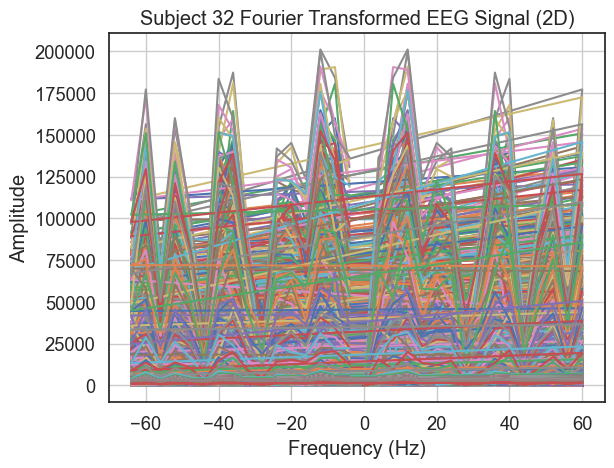

In [ ]:
x = eeg_data[1241]
fft_data = fft2(x)
freqs = fftfreq(len(fft_data), d=1/sf)

plt.plot(freqs, np.abs(fft_data))
plt.title('Subject 32 Fourier Transformed EEG Signal (2D)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# table_data = []
# for trial_index in range(eeg_data.shape[0]):
#     fft_values = np.abs(fft_data)
#     table_data.append([trial_index, fft_values])

# df = pd.DataFrame(table_data, columns=['Trial','FFT Values'])
# print(df)

In [ ]:
import pywt

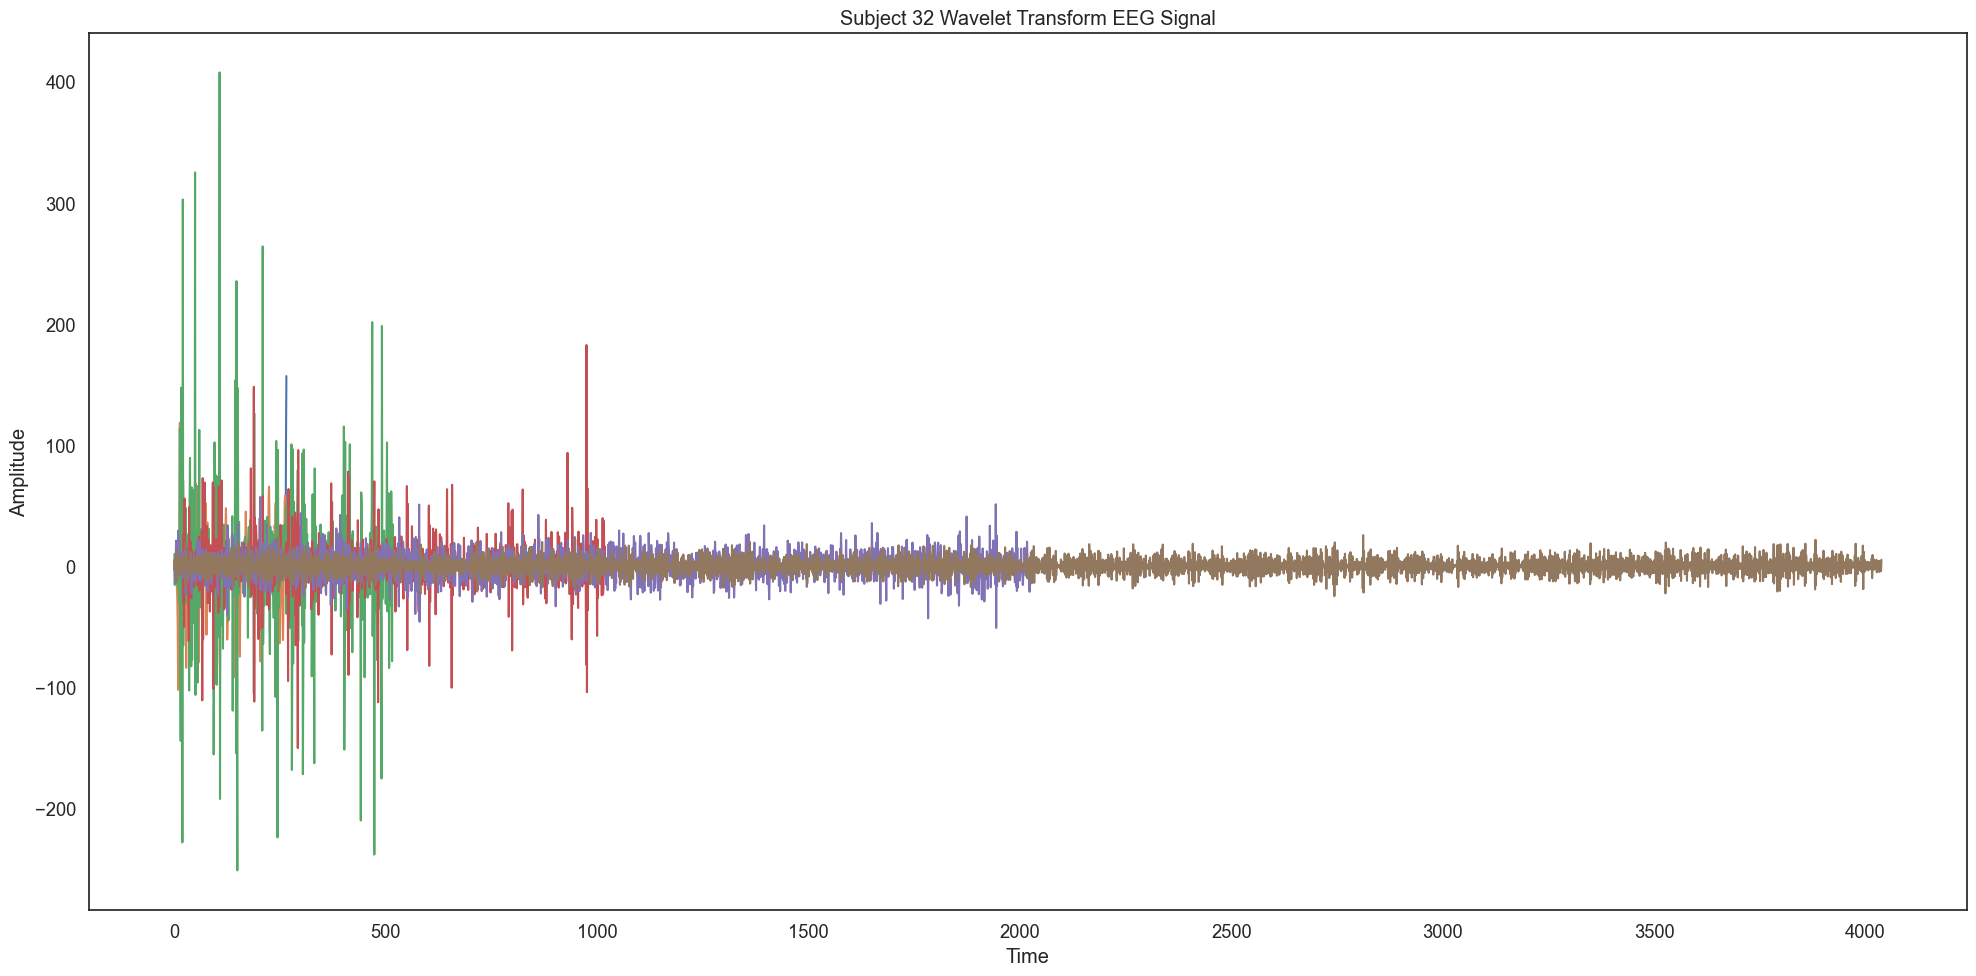

In [ ]:
wavelet = 'db8'
level = 5 

coeffs = pywt.wavedec(eeg_data, wavelet, level=level, axis=-1)
trial_index = 1241
channel_index = 3

plt.figure(figsize=(20, 10))
for i, coeff in enumerate(coeffs):
    # plt.subplot(level + 1, 1, i + 1)
    plt.plot(coeff[trial_index, channel_index])
    plt.title("Subject 32 Wavelet Transform EEG Signal")
    plt.xlabel('Time')
    plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

# table_data = []
# for trial_index in range(eeg_data.shape[0]):
#     for channel_index in range(eeg_data.shape[1]):
#         wavelet_coeffs = coeffs[0][trial_index, channel_index]
#         table_data.append([trial_index, channel_index, wavelet_coeffs])

# # Create a DataFrame for tabular representation
# df = pd.DataFrame(table_data, columns=['Trial', 'Channel', 'Wavelet Coefficients'])

# # Display DataFrame
# print(df)

In [ ]:
eeg_Fp1 = eeg_data[:,0,:]
eeg_Fp1

array([[ 0.94823168,  1.65333533,  3.01372577, ..., -2.82648937,
        -4.47722969, -3.67692812],
       [10.26017505, 12.79544273, 10.42619158, ...,  6.02219406,
         7.53913583,  9.35224904],
       [ 1.01304956, -1.0678323 ,  3.90824949, ...,  2.18687657,
         0.02667677, -7.51193325],
       ...,
       [-0.72919442,  2.12887334,  5.20246639, ..., -1.49421669,
        -0.54113012, -6.08130408],
       [-6.57733003, -3.62254483, -6.79547697, ..., -4.64330954,
         6.33701252,  3.06930179],
       [ 0.05781309,  1.36740774, -1.78313193, ..., -1.3082365 ,
        -2.09568185,  2.64131947]])

In [ ]:
import math 
 
def rmsValue(arr, n):
    square = 0
    mean = 0.0
    root = 0.0

    for i in range(0,n):
        square += (arr[i]**2)
    mean = (square / (float)(n))
    root = math.sqrt(mean)
     
    return root

In [ ]:
import statistics
from scipy.stats import kurtosis, skew

In [ ]:
eeg_Fp1_firstdiff = []
for i in range(len(eeg_Fp1)):
    x = np.diff(eeg_Fp1[i])
    x = x.tolist()
    x.insert(0, eeg_Fp1[i][0])
    x = np.array(x)
    eeg_Fp1_firstdiff.append(x)

In [ ]:
eeg_Fp1_seconddiff = []
for i in range(len(eeg_Fp1_firstdiff)):
    x = np.diff(eeg_Fp1_firstdiff[i])
    x = x.tolist()
    x.insert(0, eeg_Fp1_firstdiff[i][0])
    x = np.array(x)
    eeg_Fp1_seconddiff.append(x)

In [ ]:
eeg_Fp1_firstdiff = np.array(eeg_Fp1_firstdiff)
eeg_Fp1_seconddiff = np.array(eeg_Fp1_seconddiff)

In [ ]:
def normalize(arr):
    mean = np.mean(arr)
    std = np.std(arr)
    return (arr - mean)/std

first_normal = [normalize(i) for i in eeg_Fp1_firstdiff]
second_normal = [normalize(i) for i in eeg_Fp1_seconddiff]

In [ ]:
def mobility(arr, first_arr):
    x = float(sum(first_arr**2)/len(first_arr))
    y = sum(np.array(arr)**2)
    return np.sqrt(x/y)

def complexity(arr, first_arr):
    x = float(sum(first_arr**2)/len(first_arr))
    y = sum(np.array(arr)**2)
    z = 0
    for i in range(1, len(first_arr)):
        z += (first_arr[i] - first_arr[i-1])**2
    z = z/len(arr)
    return np.sqrt(float(z)*y/x/x)

In [ ]:
def hurst_exponent(time_series):
    n = len(time_series)

    rs = np.zeros(n)
    for i in range(1, n + 1):
        cumsum = np.cumsum(time_series[:i] - np.mean(time_series[:i]))
        cummax = np.maximum.accumulate(cumsum)
        cummin = np.minimum.accumulate(cumsum)
        rs[i - 1] = np.mean(cummax - cummin)

    rs += np.finfo(float).eps
    R = np.max(time_series) - np.min(time_series)
    S = np.std(time_series)

    hurst = np.log(rs / S) / np.log(R / S)
    return np.mean(hurst)

1.2292734168606456


In [ ]:
mean_Fp1 = [np.mean(i) for i in eeg_Fp1]
rms_Fp1 = [rmsValue(i, 8064) for i in eeg_Fp1]
stddev_Fp1 = [statistics.stdev(i) for i in eeg_Fp1]
skew_Fp1 = [skew(i) for i in eeg_Fp1]
kurtosis_Fp1 = [kurtosis(i) for i in eeg_Fp1]
mean_Fp1_first = [np.mean(i) for i in eeg_Fp1_firstdiff]
mean_Fp1_second = [np.mean(i) for i in eeg_Fp1_seconddiff]
median_Fp1_normal_first = [np.median(i) for i in first_normal]
median_Fp1_normal_second = [np.median(i) for i in second_normal]
hjorth_activity_Fp1 = [np.mean(i**2) for i in eeg_Fp1]
hjorth_mobility_Fp1 = [mobility(i,j) for i,j in zip(eeg_Fp1, eeg_Fp1_firstdiff)]
hjorth_complexity_Fp1 = [complexity(i,j) for i,j in zip(eeg_Fp1, eeg_Fp1_firstdiff)]
hurst_Fp1 = [hurst_exponent(i) for i in eeg_Fp1]


In [ ]:
def band_energy(signal_data, fs, band):
    f_low, f_high = band
    b, a = signal.butter(4, [f_low, f_high], btype='band', fs=fs)

    filtered_signal = signal.filtfilt(b, a, signal_data)
    energy = np.sum(filtered_signal ** 2) / len(filtered_signal)
    
    return energy

bands = {
    'delta': (1, 4),
    'theta': (4, 8),
    'alpha': (8, 12),
    'beta': (12, 30),
    'gamma': (30, 100)
}

band_energies = {}
for band_name, band_freqs in bands.items():
    energy = band_energy(eeg_Fp1[0], 4*sf, band_freqs)
    band_energies[band_name] = energy

for band_name, energy in band_energies.items():
    print(f"{band_name.capitalize()} band energy:", energy)


Delta band energy: 0.00401263194971437
Theta band energy: 0.0013517436769536274
Alpha band energy: 0.0007589811097822994
Beta band energy: 3.6670818614756646
Gamma band energy: 9.13195749673833


In [ ]:
def band_power(signal_data, fs, band):
    f, Pxx = signal.welch(signal_data, fs=fs, nperseg=fs*4)

    f_low, f_high = band
    idx_band = np.where((f >= f_low) & (f < f_high))[0]
    power = np.sum(Pxx[idx_band])
    
    return power

bands = {
    'delta': (1, 4),
    'theta': (4, 8),
    'alpha': (8, 12),
    'beta': (12, 30),
    'gamma': (30, 100)
}

band_psd = {}
for band_name, band_freqs in bands.items():
    power = band_power(eeg_Fp1[0], sf, band_freqs)
    band_psd[band_name] = power

for band_name, power in band_psd.items():
    print(f"{band_name.capitalize()} band power spectral density:", power)

average_band_power = np.mean(list(band_psd.values()))

print("Average band power:", average_band_power)

Delta band power spectral density: 0.026331286539598812
Theta band power spectral density: 17.780054882225144
Alpha band power spectral density: 13.736569187166666
Beta band power spectral density: 26.89479127585826
Gamma band power spectral density: 3.2098077659841007
Average band power: 12.329510879554753


In [ ]:
band_energy(eeg_Fp1[1], 4*sf, (1,4))

0.24611538817614062

In [ ]:
energy_delta_Fp1 = [band_energy(i, 4*sf, (1,4)) for i in eeg_Fp1]
energy_theta_Fp1 = [band_energy(i, 4*sf, (4,8)) for i in eeg_Fp1]
energy_alpha_Fp1 = [band_energy(i, 4*sf, (8,12)) for i in eeg_Fp1]
energy_beta_Fp1 = [band_energy(i, 4*sf, (12,30)) for i in eeg_Fp1]
energy_gamma_Fp1 = [band_energy(i, 4*sf, (30,100)) for i in eeg_Fp1]
spectral_delta_Fp1 = [band_power(i, 4*sf, (1,4)) for i in eeg_Fp1]
spectral_theta_Fp1 = [band_power(i, 4*sf, (4,8)) for i in eeg_Fp1]
spectral_alpha_Fp1 = [band_power(i, 4*sf, (8,12)) for i in eeg_Fp1]
spectral_beta_Fp1 = [band_power(i, 4*sf, (12,30)) for i in eeg_Fp1]
spectral_gamma_Fp1 = [band_power(i, 4*sf, (30,100)) for i in eeg_Fp1]

In [192]:
datalist = list(zip(mean_Fp1, rms_Fp1, stddev_Fp1, skew_Fp1, kurtosis_Fp1, mean_Fp1_first, mean_Fp1_second, 
                    median_Fp1_normal_first,median_Fp1_normal_second, hjorth_activity_Fp1, hjorth_mobility_Fp1, 
                    hjorth_complexity_Fp1, hurst_Fp1, energy_delta_Fp1, energy_theta_Fp1, energy_alpha_Fp1,
                    energy_beta_Fp1, energy_gamma_Fp1, spectral_delta_Fp1, spectral_theta_Fp1, spectral_alpha_Fp1,
                    spectral_beta_Fp1, spectral_gamma_Fp1))

In [193]:
df_data = pd.DataFrame(datalist, columns=['mean_Fp1', 'rms_Fp1', 'stddev_Fp1', 'skew_Fp1', 'kurtosis_Fp1', 'mean_Fp1_first', 
                                          'mean_Fp1_second', 'median_Fp1_normal_first','median_Fp1_normal_second',
                                          'hjorth_activity_Fp1', 'hjorth_mobility_Fp1', 'hjorth_complexity_Fp1', 
                                          'hurst_Fp1', 'energy_delta_Fp1', 'energy_theta_Fp1', 'energy_alpha_Fp1',
                                          'energy_beta_Fp1', 'energy_gamma_Fp1', 'spectral_delta_Fp1', 'spectral_theta_Fp1', 
                                          'spectral_alpha_Fp1','spectral_beta_Fp1', 'spectral_gamma_Fp1'])

In [205]:
median_valence = df_labels['Valence'].median()
median_arousal = df_labels['Arousal'].median()

# Create conditions based on median values
conditions = [
    (df_labels['Valence'] >= median_valence) & (df_labels['Arousal'] >= median_arousal),
    (df_labels['Valence'] < median_valence) & (df_labels['Arousal'] >= median_arousal),
    (df_labels['Valence'] >= median_valence) & (df_labels['Arousal'] < median_arousal),
    (df_labels['Valence'] < median_valence) & (df_labels['Arousal'] < median_arousal)
]

# Define values corresponding to each condition
values = [0, 1, 2, 3]

# Create new column 'classification' based on conditions
df_data['target'] = np.select(conditions, values)

In [207]:
df_data.head(15)

,mean_Fp1,rms_Fp1,stddev_Fp1,skew_Fp1,kurtosis_Fp1,mean_Fp1_first,mean_Fp1_second,median_Fp1_normal_first,median_Fp1_normal_second,hjorth_activity_Fp1,...,energy_theta_Fp1,energy_alpha_Fp1,energy_beta_Fp1,energy_gamma_Fp1,spectral_delta_Fp1,spectral_theta_Fp1,spectral_alpha_Fp1,spectral_beta_Fp1,spectral_gamma_Fp1,target
0,-0.028259,3.889524,3.889663,-0.046640,0.743994,-0.000456,0.000099,-0.002138,0.014801,15.128399,...,0.001352,0.000759,3.667082,9.131957,5.855629e-11,3.299747e-10,4.357491e-09,17.855080,40.465709,0
1,-0.082712,4.261797,4.261258,-0.083895,0.710815,0.001160,0.000225,-0.005261,-0.013002,18.162913,...,0.092615,0.049401,4.842426,10.380191,5.884177e-11,5.770251e-10,1.335753e-08,22.398298,42.111475,0
2,0.060689,4.317650,4.317491,-0.032862,0.822480,-0.000932,-0.000935,-0.006503,0.000463,18.642102,...,0.001383,0.000221,4.504640,11.221690,3.228824e-10,1.173168e-09,1.228782e-08,16.990148,47.428770,0
3,-0.027773,3.961999,3.962147,-0.061074,0.869061,-0.001103,0.000521,0.002138,-0.004241,15.697433,...,0.042830,0.014707,4.412074,8.760153,5.133959e-11,3.180936e-10,5.350211e-09,17.254056,32.459221,1
4,-0.062537,3.523328,3.522992,0.012391,0.368222,0.000019,-0.000141,0.005602,0.011894,12.413843,...,0.001896,0.001039,2.408491,7.951263,5.629857e-11,2.763427e-10,3.282805e-09,9.771475,33.954042,2
5,-0.014284,3.925895,3.926112,-0.147767,0.617735,0.000737,0.000392,-0.013826,-0.004251,15.412652,...,0.090718,0.038903,3.837381,8.952703,8.611671e-11,4.490116e-10,6.828061e-09,14.165910,36.887711,2
6,-0.048092,4.112946,4.112920,-0.042128,1.324181,0.000801,-0.000081,-0.002333,-0.003477,16.916327,...,0.006799,0.000609,4.436501,10.040814,8.175795e-11,4.761896e-10,8.928170e-09,16.055989,41.283910,2
7,-0.048061,4.553130,4.553159,-0.060561,0.701170,-0.000105,-0.000357,-0.000659,0.000182,20.730997,...,0.009821,0.007011,5.990527,11.686862,1.023322e-10,5.041565e-10,8.044655e-09,26.678468,48.167761,2
8,-0.050615,4.669426,4.669441,-0.056524,0.516445,-0.000575,-0.000315,-0.014076,0.005971,21.803535,...,0.014177,0.007908,6.053786,12.410682,5.156984e-11,3.724320e-10,7.285162e-09,26.998268,53.931127,3
9,-0.058780,4.095102,4.094934,0.077623,1.030940,-0.000080,-0.000387,0.001351,0.014177,16.769862,...,0.067930,0.032254,3.824349,10.379861,5.969012e-11,3.096262e-10,6.109985e-09,16.533865,40.921172,3


In [214]:
X_train = df_data.iloc[:879, :23]
Y_train = df_data.iloc[:879, -1]
X_test = df_data.iloc[880:, :23]
Y_test = df_data.iloc[880:, -1]

In [219]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

poly = svm.SVC(kernel='poly', degree=3, C=1).fit(X_train, Y_train)
poly_pred = poly.predict(X_test)

In [2]:
poly_accuracy = accuracy_score(Y_test, poly_pred)
poly_f1 = f1_score(Y_test, poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))

Accuracy (Polynomial Kernel): 45.05
F1 (Polynomial Kernel): 27.75
